## Import Libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read and view the data

In [56]:
df = pd.read_csv("Mall-Customers-dataset.csv",index_col = 0)

In [57]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## Print top 5 columns

In [58]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## Print bottom 5 columns

In [59]:
df.tail()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83


## Infomation of dataset

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


## Stastical infomation of dataset

In [61]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Checking number of rows and columns

In [62]:
df.shape

(200, 4)

## Datatypes of each columns

In [63]:
df.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Checking the null values

In [64]:
df.isnull()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
...,...,...,...,...
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [65]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
df = df.rename({"Annual Income (k$)":"Income","Spending Score (1-100)":"Score"},axis = 1)

In [68]:
df

,Genre,Age,Income,Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


## Choosing Annual income and Spending score column

In [69]:
x = df.iloc[:,[2,3]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [70]:
import scipy.cluster.hierarchy as sch

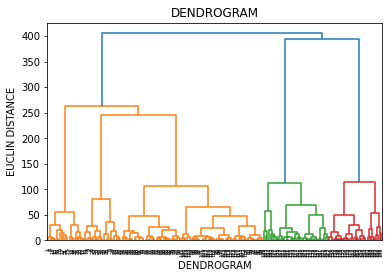

In [71]:
d = sch.dendrogram(sch.linkage(x,method = "ward"))
plt.title("DENDROGRAM")
plt.xlabel("DENDROGRAM")
plt.ylabel("EUCLIN DISTANCE")
plt.show()

In [72]:
from sklearn.cluster import AgglomerativeClustering

In [73]:
h = AgglomerativeClustering(n_clusters = 5,affinity = "euclidean",linkage = "ward")
h

AgglomerativeClustering(n_clusters=5)

In [74]:
y_predict = h.fit_predict(x)

In [75]:
y_predict

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [76]:
df["cluster"] = y_predict

In [77]:
df

,Genre,Age,Income,Score,cluster
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,3
3,Female,20,16,6,4
4,Female,23,16,77,3
5,Female,31,17,40,4
...,...,...,...,...,...
196,Female,35,120,79,2
197,Female,45,126,28,0
198,Male,32,126,74,2


In [78]:
sf0 = df[df.cluster == 0]
sf0

,Genre,Age,Income,Score,cluster
CustomerID,,,,,
129,Male,59,71,11,0
131,Male,47,71,9,0
135,Male,20,73,5,0
137,Female,44,73,7,0
139,Male,19,74,10,0
141,Female,57,75,5,0
145,Male,25,77,12,0
149,Female,34,78,22,0
151,Male,43,78,17,0


In [79]:
sf1 = df[df.cluster == 1]
sf1

,Genre,Age,Income,Score,cluster
CustomerID,,,,,
44,Female,31,39,61,1
46,Female,24,39,65,1
47,Female,50,40,55,1
48,Female,27,40,47,1
49,Female,29,40,42,1
...,...,...,...,...,...
127,Male,43,71,35,1
133,Female,25,72,34,1
143,Female,28,76,40,1


In [80]:
sf2 = df[df.cluster == 2]
sf2

,Genre,Age,Income,Score,cluster
CustomerID,,,,,
124,Male,39,69,91,2
126,Female,31,70,77,2
128,Male,40,71,95,2
130,Male,38,71,75,2
132,Male,39,71,75,2
134,Female,31,72,71,2
136,Female,29,73,88,2
138,Male,32,73,73,2
140,Female,35,74,72,2


In [81]:
sf3 = df[df.cluster == 3]
sf3

,Genre,Age,Income,Score,cluster
CustomerID,,,,,
2,Male,21,15,81,3
4,Female,23,16,77,3
6,Female,22,17,76,3
8,Female,23,18,94,3
10,Female,30,19,72,3
12,Female,35,19,99,3
14,Female,24,20,77,3
16,Male,22,20,79,3
18,Male,20,21,66,3


In [82]:
sf4 = df[df.cluster == 4]
sf4

,Genre,Age,Income,Score,cluster
CustomerID,,,,,
1,Male,19,15,39,4
3,Female,20,16,6,4
5,Female,31,17,40,4
7,Female,35,18,6,4
9,Male,64,19,3,4
11,Male,67,19,14,4
13,Female,58,20,15,4
15,Male,37,20,13,4
17,Female,35,21,35,4


## Hierarchy Cluster Plot

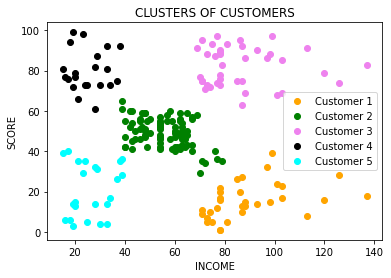

In [88]:
plt.scatter(sf0.Income,sf0.Score,color = "orange",label = "Customer 1")
plt.scatter(sf1.Income,sf1.Score,color = "green",label = "Customer 2")
plt.scatter(sf2.Income,sf2.Score,color = "violet",label = "Customer 3")
plt.scatter(sf3.Income,sf3.Score,color = "black",label = "Customer 4")
plt.scatter(sf4.Income,sf4.Score,color = "cyan",label = "Customer 5")

plt.title("CLUSTERS OF CUSTOMERS")
plt.xlabel("INCOME")
plt.ylabel("SCORE")

plt.legend()
plt.show()